In [1]:
import requests
import json
import pandas as pd
import numpy as np

In [6]:
musickey = '85b3bdb8bd0645e5b070b58deb055d27' #apikey

In [7]:
# testing to see functionality
musicurl = f'https://ws.audioscrobbler.com/2.0/?method=album.getinfo&api_key={musickey}&artist=Cher&album=Believe&format=json'
ff = f'https://ws.audioscrobbler.com/2.0/?method=artist.gettopalbums&artist=cher,madonna&api_key={musickey}&format=json'
top = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&format=json'
artist = f'https://ws.audioscrobbler.com/2.0/?method=artist.getinfo&artist=Cher&api_key={musickey}&format=json'

In [8]:
topartists1 = json.loads(requests.get(top).text) # get list of fifty top artists

In [9]:
top2 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=2&format=json'
topartists2 = json.loads(requests.get(top2).text)
#topartists2 #get fifty more top artists

In [10]:
top3 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=3&format=json'
topartists3 = json.loads(requests.get(top3).text)
#topartists3 # get fifty more top artists

In [11]:
top4 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=4&format=json'
topartists4 = json.loads(requests.get(top4).text)
#topartists4 # get fifty more top artists

In [12]:
top5 = f'https://ws.audioscrobbler.com/2.0/?method=chart.gettopartists&api_key={musickey}&page=5&format=json'
topartists5 = json.loads(requests.get(top5).text)
#topartists5 # get fifty more top artists

In [13]:
topartists1['artists']['artist'][0] # figuring out data structure
tal1 = [entry['name'] for entry in topartists1['artists']['artist']] # pull out names of each set of fifty artists
tal2 = [entry['name'] for entry in topartists2['artists']['artist']]
tal3 = [entry['name'] for entry in topartists3['artists']['artist']]
tal4 = [entry['name'] for entry in topartists4['artists']['artist']]
tal5 = [entry['name'] for entry in topartists5['artists']['artist']]
artist_list = tal1 + tal2 + tal3 + tal4 + tal5 # append lists of names together
#artist_list

In [14]:
all_info = [] # initialize empty list to fill with artist info
for artist in artist_list:
    url = f'https://ws.audioscrobbler.com/2.0/?method=artist.getinfo&artist={artist}&api_key={musickey}&format=json'
    all_info.append(json.loads(requests.get(url).text)) # make a artist info request with each name in artist_list
    # and append to all_info
#all_info

In [15]:
# extract playcounts for each artist
all_info[0]['artist']['stats']['playcount'] # figuring out structure of data
playcounts = [entry['artist']['stats']['playcount'] for entry in all_info]

In [16]:
# extract listeners for each artist
listeners = [entry['artist']['stats']['listeners'] for entry in all_info]

In [17]:
# extract genres for each artist
#ts = list(all_info[0]['artist'].values())
#new_attempt = [[list(entry['artist'].values())[i] for i in [0,8]] for entry in all_info]
#print(type(new_attempt[0][1]))
#print(new_attempt)
#[list(entry['artist'].values())[i] for i in [0,8] for sublist in all_info for entry in sublist]
#genrespt1 = [entry['artist']['tags']['tag'] for entry in all_info]
#genrespt1 = [entry['artist'][['name','tags']] for entry in all_info]
#print(genrespt1)
#print(genrespt1[0][0])
#[entry['name'] for sublist in genrespt1 for entry in sublist]
#[entry[1] for entry in new_attempt]
#genrespt1

#entry['artist'][i] for i in ['name','tags'] for entry in all_info]


#for i in range(len(genrecrap)):
#    print(i, len(genrecrap[i]) >= 3)
# 168, 133, 57
#genrecrap[168]
prelimdf = pd.DataFrame([entry['artist'] for entry in all_info])
prelimdf.drop(columns=['mbid','url','image','streamable','stats','similar','bio'],inplace=True)
prelimdf['playcount'] = playcounts
prelimdf['listeners'] = listeners
genrecrap = prelimdf['tags']
for i in range(len(genrecrap)):
    genrecrap[i] = genrecrap[i]['tag']
for i in range(len(genrecrap)):
    genrecrap[i] = [entry['name'] for entry in genrecrap[i]]
prelimdf[prelimdf['name'] == 'Taylor Swift']

,name,ontour,tags,playcount,listeners
0,Taylor Swift,1,"[country, pop, female vocalists, singer-songwr...",1832552328,4325842
50,Taylor Swift,1,"[country, pop, female vocalists, singer-songwr...",1835951215,4327718


In [18]:
prelimdf = pd.DataFrame([entry['artist'] for entry in all_info])
prelimdf.drop(columns=['mbid','url','image','streamable','stats','similar','bio'],inplace=True)
prelimdf['playcount'] = playcounts
prelimdf['listeners'] = listeners
genrecrap = prelimdf['tags']
for i in range(len(genrecrap)):
    genrecrap[i] = genrecrap[i]['tag']
for i in range(len(genrecrap)):
    genrecrap[i] = [entry['name'] for entry in genrecrap[i]]
uniquegenre = []
for i in range(len(genrecrap)):
    for j in range(len(genrecrap[i])):
        if genrecrap[i][j] not in uniquegenre:
            uniquegenre.append(genrecrap[i][j])
to_remove = ['Canadian','seen live','compton','ofwgkta','r&b','australian','britpop','female vocalists',
                   'swag','female vocalist','slow jams','UK Garage','2-step','Korean','black metal',
                    'Eminem','pittsburgh','New Zealand','slowcore','hip hop','Kpop',
                   'better than selena gomez','jay-z','legend','Brent Faiyaz',
                   'Sophisti-Pop','one direction','X factor','spanish','Dirty South','ten million plays',
                   'mf doom','plugg','rage','Mariah Carey','guilty pleasure','downtempo','new york','opium',
                   'dnb','Horrorcore','sexy','noise','shoegazer','florida','United States',
                   'thicc','idm','Minnesota','miami','chicago','soprano sax','glam','atlanta','drone rock']
goodgenres = [item for item in uniquegenre if item not in to_remove]
for i in range(len(genrecrap)):
    genrecrap[i] = [entry for entry in genrecrap[i] if entry not in to_remove]
for entry in genrecrap:
    while len(entry) < 3:
        entry.append('NA')
prelimdf['genre1'] = [entry[0] for entry in genrecrap]
prelimdf['genre2'] = [entry[1] for entry in genrecrap]
prelimdf['genre3'] = [entry[2] for entry in genrecrap]
# standardizing genre spelling
#print(len(prelimdf['genre1'].unique()))
#print(prelimdf['genre1'].unique())
prelimdf['genre1'] = prelimdf['genre1'].str.lower().str.replace('-',' ')
#print(len(prelimdf['genre1'].unique()))
#print(prelimdf['genre1'].unique())
#print(len(prelimdf['genre2'].unique()))
#print(prelimdf['genre2'].unique())
prelimdf['genre2'] = prelimdf['genre2'].str.lower().str.replace('-',' ').str.replace('kpop','k pop') \
.str.replace('&', 'n')
#print(len(prelimdf['genre2'].unique()))
#print(prelimdf['genre2'].unique())
#print(len(prelimdf['genre3'].unique()))
#print(prelimdf['genre3'].unique())
prelimdf['genre3'] = prelimdf['genre3'].str.lower().str.replace('-',' ').str.replace('kpop','k pop') \
.str.replace('&', 'n')
#print(len(prelimdf['genre3'].unique()))
#print(prelimdf['genre3'].unique())
prelimdf.drop(columns='tags',inplace=True)

In [19]:
prelimdf

,name,ontour,playcount,listeners,genre1,genre2,genre3
0,Taylor Swift,1,1832552328,4325842,country,pop,singer songwriter
1,The Weeknd,0,553521894,3595509,rnb,electronic,dubstep
2,Kanye West,0,868686321,6287553,hip hop,rap,rnb
3,Drake,1,572925666,5243662,hip hop,rap,rnb
4,Lana Del Rey,0,785683560,3730745,indie,indie pop,pop
...,...,...,...,...,...,...,...
295,Cardi B,0,45828265,1528407,hip hop,rap,trap
296,Crystal Castles,0,147130008,2239219,electronic,8 bit,new rave
297,LUCKI,0,101134777,553861,trap,hip hop,rap
298,Wham!,0,22445365,2176097,80s,pop,british


In [21]:
artists = prelimdf

In [22]:
artists.to_csv('artists.csv')

In [ ]:
name, playcount, listeners, sex, genre, age?

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
popgenre = artists[(artists['genre1'] == 'pop') | (artists['genre2'] == 'pop') | (artists['genre3'] == 'pop')]
hiphopgenre = artists[(artists['genre1'] == 'hip hop') | (artists['genre2'] == 'hip hop') | (
    artists['genre3'] == 'hip hop')]

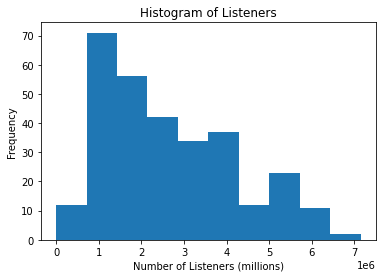

In [78]:
plt.hist(artists['listeners'].astype(int), bins=10);
plt.xlabel('Number of Listeners (millions)');
plt.ylabel('Frequency');
plt.title('Histogram of Listeners');
plt.savefig('listenershist.jpg')

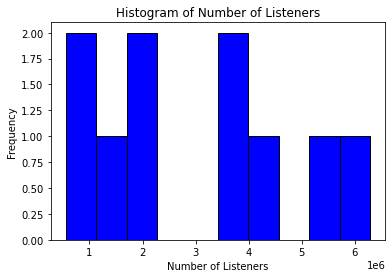

In [47]:
# Your data
data = [4325842, 3595509, 6287553, 5243662, 3730745, 1528407, 2239219, 553861, 2176097, 1119052]

# Plotting the histogram
plt.hist(data, bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of Listeners')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Listeners')

# Show the plot
plt.show()